# `rev_tortuosity`

This notebook illustrates the use of `rev_tortuosity`, as well as the functionalities of the resulting object.

Import necessary packages

In [1]:
import matplotlib.pyplot as plt

import porespy as ps

ps.settings.loglevel = 50
ps.settings.tqdm['disable'] = False
ps.settings.tqdm['leave'] = True

No module named 'pyedt'


Generate an artificial 2D image for illustration purposes:

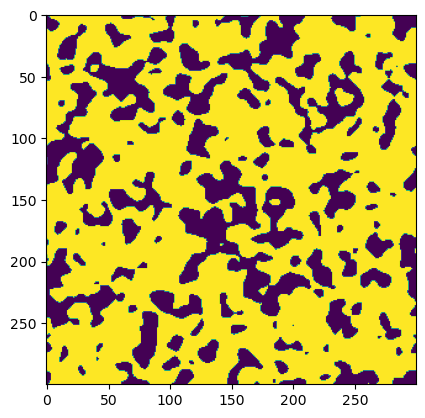

In [2]:
im = ps.generators.blobs([300]*2, porosity=0.7, blobiness=2, seed=1)
plt.imshow(im)

The function `rev_tortuosity` is able to accept slices for the subdomains to be processed. This can be generated using `ps.tools.get_slices_random` and `ps.tools.get_slices_multigrid` - previously `ps.tools.subdivide`. Alternatively, you can provide your own slice indices.

`get_slices_random` accepts an image, as well as the number of random slice indices to generate, this can be tweaked to suit your needs better.

`get_slices_multigrid` accepts an image, as well as the bounds for a range of slice sizes, and a step size, behaving similarly to `np.arange`.

In [3]:
slices = ps.tools.get_slices_random(im, 500)
rev = ps.metrics.rev_tortuosity(im, slices=slices, axis=0, dask_on=True)
converted = ps.tools.results_to_df(rev)


get_slices_random:   0%|          | 0/493 [00:00<?, ?it/s]

tortuosity_map:   0%|          | 0/493 [00:00<?, ?it/s]

The results for the porosity profile are simultaneously obtained, and can be accessed with the various different attributes associated with the custom Results object.

In [4]:
print(rev)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Results of rev_tortuosity generated at Wed May  7 09:08:31 2025
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
porosity_orig             Dictionary with 493 items
porosity_perc             Dictionary with 493 items
g                         Dictionary with 493 items
tau                       Dictionary with 493 items
volume                    Dictionary with 493 items
length                    Dictionary with 493 items
axis                      Dictionary with 493 items
time                      Dictionary with 493 items
slice                     Dictionary with 493 items
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


## Plotting the results

Lets plot the results and see if an REV has been found for both porosity and tortuosity. This would be roughly indicated by a stabilized value of porosity or tortuosity with an increasing subdomain volume.

Text(0, 0.5, 'log(Tortuosity)')

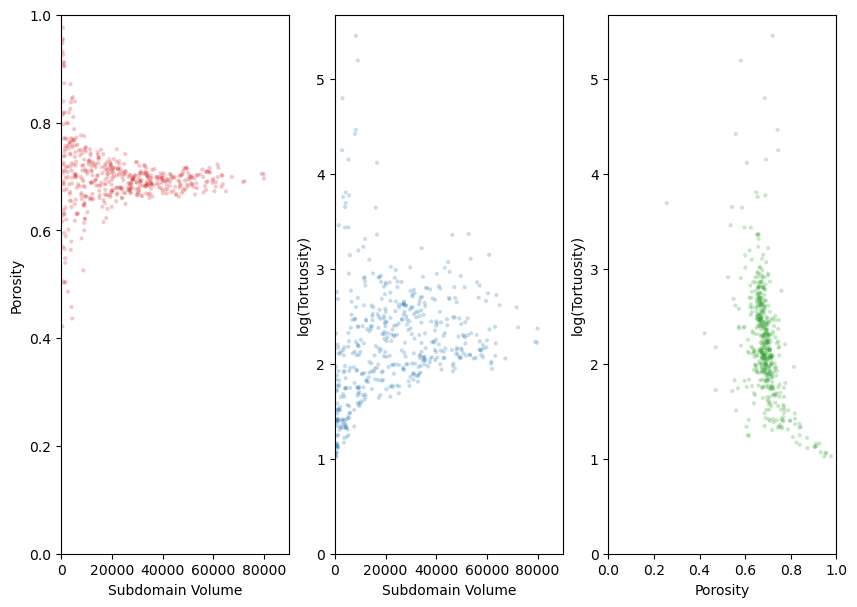

In [5]:
fig, ax = plt.subplots(1, 3, figsize=[10, 7])
ax[0].scatter(rev.volume, rev.porosity_orig, marker='.', alpha=0.25, fc='tab:red', ec='none')
ax[1].scatter(rev.volume[rev.axis == 0], rev.tau[rev.axis == 0], marker='.', alpha=0.25, fc='tab:blue', ec='none')
ax[2].scatter(rev.porosity_perc[rev.axis == 0], rev.tau[rev.axis == 0], marker='.', alpha=0.25, fc='tab:green', ec='none')
ax[0].set_ylim([0, 1])
ax[0].set_xlim([0, im.size])
ax[0].set_ylabel('Porosity')
ax[0].set_xlabel('Subdomain Volume')
ax[1].set_ylim([0, None])
ax[1].set_xlim([0, im.size])
ax[1].set_ylabel('log(Tortuosity)')
ax[1].set_xlabel('Subdomain Volume')
ax[2].set_xlim([0, 1])
ax[2].set_ylim([0, None])
ax[2].set_xlabel('Porosity')
ax[2].set_ylabel('log(Tortuosity)')

Alternatively, lets use `get_slices_multigrid`.

tortuosity_map:   0%|          | 0/333 [00:00<?, ?it/s]

Text(0, 0.5, 'log(Tortuosity)')

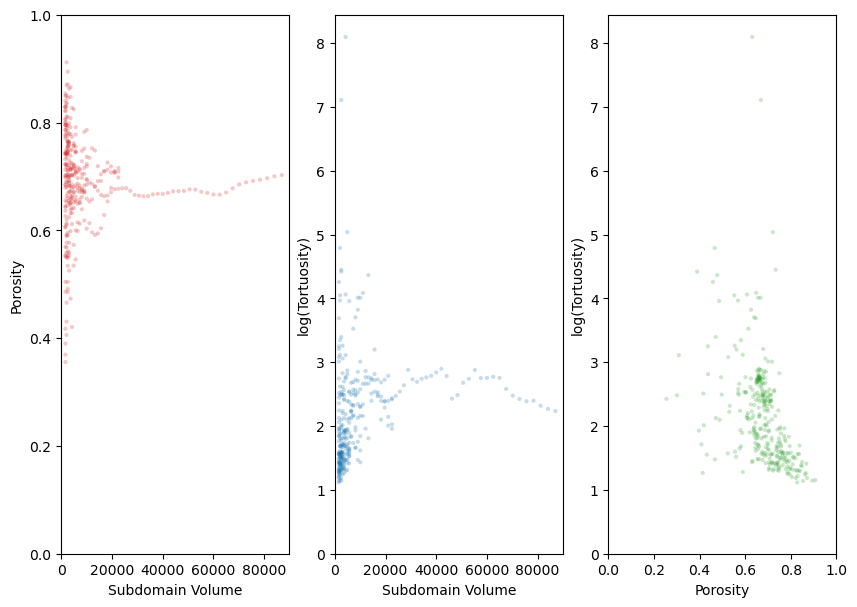

In [6]:
slices = ps.tools.get_slices_multigrid(im, [40, 300, 5])
rev = ps.metrics.rev_tortuosity(im, slices=slices, axis=0, dask_on=True)
converted = ps.tools.results_to_df(rev)

fig, ax = plt.subplots(1, 3, figsize=[10, 7])
ax[0].scatter(rev.volume, rev.porosity_orig, marker='.', alpha=0.25, fc='tab:red', ec='none')
ax[1].scatter(rev.volume[rev.axis == 0], rev.tau[rev.axis == 0], marker='.', alpha=0.25, fc='tab:blue', ec='none')
ax[2].scatter(rev.porosity_perc[rev.axis == 0], rev.tau[rev.axis == 0], marker='.', alpha=0.25, fc='tab:green', ec='none')
ax[0].set_ylim([0, 1])
ax[0].set_xlim([0, im.size])
ax[0].set_ylabel('Porosity')
ax[0].set_xlabel('Subdomain Volume')
ax[1].set_ylim([0, None])
ax[1].set_xlim([0, im.size])
ax[1].set_ylabel('log(Tortuosity)')
ax[1].set_xlabel('Subdomain Volume')
ax[2].set_xlim([0, 1])
ax[2].set_ylim([0, None])
ax[2].set_xlabel('Porosity')
ax[2].set_ylabel('log(Tortuosity)')

The multigrid method does not include overlap of blocks, so a block size which exceeds 50% of the image length will result in the remainder of the image being trimmed off, which can be seen in the first two graphs. This results in far less data points when compared to `get_slices_random`. The domain of the singular block being analyzed is being increased until it encompasses the whole image. The sudden drops in the tortuosity plot likely indicate the image "finding" an additional exit or percolating path from one face of the image to the opposite face.